In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 1.2104 - categorical cross entropy: 1.2104 - mean squared error: 0.0772 - accuracy: 0.6519 - auc: 0.6663 - prc: 0.1983

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_1\assets


29/29 [==============================] - 154s 3s/step - loss: 1.2104 - categorical cross entropy: 1.2104 - mean squared error: 0.0772 - accuracy: 0.6519 - auc: 0.6663 - prc: 0.1983 - val_loss: 1.4066 - val_categorical cross entropy: 1.4066 - val_mean squared error: 0.0939 - val_accuracy: 0.6705 - val_auc: 0.3516 - val_prc: 0.1175 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - 15s 510ms/step - loss: 0.9314 - categorical cross entropy: 0.9314 - mean squared error: 0.0612 - accuracy: 0.6552 - auc: 0.8030 - prc: 0.2512 - val_loss: 1.4314 - val_categorical cross entropy: 1.4314 - val_mean squared error: 0.0838 - val_accuracy: 0.6710 - val_auc: 0.5169 - val_prc: 0.1592 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 0.8567 - categorical cross entropy: 0.8567 - mean squared error: 0.0561 - accuracy: 0.6929 - auc: 0.8264 - prc: 0.2569

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_3\assets


29/29 [==============================] - 75s 3s/step - loss: 0.8567 - categorical cross entropy: 0.8567 - mean squared error: 0.0561 - accuracy: 0.6929 - auc: 0.8264 - prc: 0.2569 - val_loss: 1.2567 - val_categorical cross entropy: 1.2567 - val_mean squared error: 0.0778 - val_accuracy: 0.6700 - val_auc: 0.5093 - val_prc: 0.1641 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 14s 494ms/step - loss: 0.8865 - categorical cross entropy: 0.8865 - mean squared error: 0.0585 - accuracy: 0.6719 - auc: 0.8179 - prc: 0.2591 - val_loss: 1.5722 - val_categorical cross entropy: 1.5722 - val_mean squared error: 0.0751 - val_accuracy: 0.6705 - val_auc: 0.6701 - val_prc: 0.2063 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 17s 584ms/step - loss: 0.8364 - categorical cross entropy: 0.8364 - mean squared error: 0.0549 - accuracy: 0.6940 - auc: 0.8256 - prc: 0.2589 - val_loss: 1.6579 - val_categorical cross entropy: 1.6579 - val_mean squared error: 0.0786 - val_accu

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_6\assets


29/29 [==============================] - 77s 3s/step - loss: 0.8589 - categorical cross entropy: 0.8589 - mean squared error: 0.0576 - accuracy: 0.6923 - auc: 0.8266 - prc: 0.2766 - val_loss: 1.1691 - val_categorical cross entropy: 1.1691 - val_mean squared error: 0.0629 - val_accuracy: 0.6910 - val_auc: 0.7567 - val_prc: 0.2412 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - ETA: 0s - loss: 0.8282 - categorical cross entropy: 0.8282 - mean squared error: 0.0555 - accuracy: 0.7080 - auc: 0.8402 - prc: 0.2964

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_7\assets


29/29 [==============================] - 78s 3s/step - loss: 0.8282 - categorical cross entropy: 0.8282 - mean squared error: 0.0555 - accuracy: 0.7080 - auc: 0.8402 - prc: 0.2964 - val_loss: 1.1334 - val_categorical cross entropy: 1.1334 - val_mean squared error: 0.0670 - val_accuracy: 0.6770 - val_auc: 0.7288 - val_prc: 0.2353 - lr: 0.0010
Epoch 8/100
29/29 [==============================] - ETA: 0s - loss: 0.8120 - categorical cross entropy: 0.8120 - mean squared error: 0.0554 - accuracy: 0.6923 - auc: 0.8597 - prc: 0.3165

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_8\assets


29/29 [==============================] - 77s 3s/step - loss: 0.8120 - categorical cross entropy: 0.8120 - mean squared error: 0.0554 - accuracy: 0.6923 - auc: 0.8597 - prc: 0.3165 - val_loss: 1.0039 - val_categorical cross entropy: 1.0039 - val_mean squared error: 0.0595 - val_accuracy: 0.6955 - val_auc: 0.7844 - val_prc: 0.3504 - lr: 0.0010
Epoch 9/100
29/29 [==============================] - ETA: 0s - loss: 0.8468 - categorical cross entropy: 0.8468 - mean squared error: 0.0579 - accuracy: 0.6837 - auc: 0.8607 - prc: 0.3199

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_9\assets


29/29 [==============================] - 76s 3s/step - loss: 0.8468 - categorical cross entropy: 0.8468 - mean squared error: 0.0579 - accuracy: 0.6837 - auc: 0.8607 - prc: 0.3199 - val_loss: 1.0009 - val_categorical cross entropy: 1.0009 - val_mean squared error: 0.0601 - val_accuracy: 0.6950 - val_auc: 0.7823 - val_prc: 0.2795 - lr: 0.0010
Epoch 10/100
29/29 [==============================] - 12s 418ms/step - loss: 0.7750 - categorical cross entropy: 0.7750 - mean squared error: 0.0525 - accuracy: 0.7209 - auc: 0.8555 - prc: 0.3096 - val_loss: 1.0825 - val_categorical cross entropy: 1.0825 - val_mean squared error: 0.0636 - val_accuracy: 0.6775 - val_auc: 0.7726 - val_prc: 0.2811 - lr: 0.0010
Epoch 11/100
29/29 [==============================] - 13s 453ms/step - loss: 0.7951 - categorical cross entropy: 0.7951 - mean squared error: 0.0547 - accuracy: 0.7069 - auc: 0.8521 - prc: 0.3341 - val_loss: 1.4071 - val_categorical cross entropy: 1.4071 - val_mean squared error: 0.0810 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_16\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_16\assets


29/29 [==============================] - 83s 3s/step - loss: 0.7881 - categorical cross entropy: 0.7881 - mean squared error: 0.0550 - accuracy: 0.7053 - auc: 0.8774 - prc: 0.4134 - val_loss: 0.9667 - val_categorical cross entropy: 0.9667 - val_mean squared error: 0.0632 - val_accuracy: 0.6850 - val_auc: 0.8589 - val_prc: 0.3996 - lr: 0.0010
Epoch 17/100
29/29 [==============================] - ETA: 0s - loss: 0.7876 - categorical cross entropy: 0.7876 - mean squared error: 0.0552 - accuracy: 0.7112 - auc: 0.8787 - prc: 0.4045

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_17\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_17\assets


29/29 [==============================] - 77s 3s/step - loss: 0.7876 - categorical cross entropy: 0.7876 - mean squared error: 0.0552 - accuracy: 0.7112 - auc: 0.8787 - prc: 0.4045 - val_loss: 0.7687 - val_categorical cross entropy: 0.7687 - val_mean squared error: 0.0528 - val_accuracy: 0.7205 - val_auc: 0.8700 - val_prc: 0.4141 - lr: 0.0010
Epoch 18/100
29/29 [==============================] - 12s 420ms/step - loss: 0.7870 - categorical cross entropy: 0.7870 - mean squared error: 0.0533 - accuracy: 0.7263 - auc: 0.8638 - prc: 0.4001 - val_loss: 1.0537 - val_categorical cross entropy: 1.0537 - val_mean squared error: 0.0652 - val_accuracy: 0.6700 - val_auc: 0.8390 - val_prc: 0.3617 - lr: 0.0010
Epoch 19/100
29/29 [==============================] - 12s 422ms/step - loss: 0.7638 - categorical cross entropy: 0.7638 - mean squared error: 0.0528 - accuracy: 0.7198 - auc: 0.8775 - prc: 0.3798 - val_loss: 0.8249 - val_categorical cross entropy: 0.8249 - val_mean squared error: 0.0559 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_24\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_24\assets


29/29 [==============================] - 94s 3s/step - loss: 0.6732 - categorical cross entropy: 0.6732 - mean squared error: 0.0475 - accuracy: 0.7526 - auc: 0.9126 - prc: 0.4806 - val_loss: 0.7575 - val_categorical cross entropy: 0.7575 - val_mean squared error: 0.0508 - val_accuracy: 0.7380 - val_auc: 0.8570 - val_prc: 0.4357 - lr: 0.0010
Epoch 25/100
29/29 [==============================] - ETA: 0s - loss: 0.6774 - categorical cross entropy: 0.6774 - mean squared error: 0.0471 - accuracy: 0.7672 - auc: 0.8979 - prc: 0.4616

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_25\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_25\assets


29/29 [==============================] - 77s 3s/step - loss: 0.6774 - categorical cross entropy: 0.6774 - mean squared error: 0.0471 - accuracy: 0.7672 - auc: 0.8979 - prc: 0.4616 - val_loss: 0.7294 - val_categorical cross entropy: 0.7294 - val_mean squared error: 0.0505 - val_accuracy: 0.7235 - val_auc: 0.8849 - val_prc: 0.5053 - lr: 0.0010
Epoch 26/100
29/29 [==============================] - 12s 418ms/step - loss: 0.6973 - categorical cross entropy: 0.6973 - mean squared error: 0.0482 - accuracy: 0.7522 - auc: 0.8901 - prc: 0.4843 - val_loss: 0.9072 - val_categorical cross entropy: 0.9072 - val_mean squared error: 0.0642 - val_accuracy: 0.6505 - val_auc: 0.8486 - val_prc: 0.4115 - lr: 0.0010
Epoch 27/100
29/29 [==============================] - 12s 421ms/step - loss: 0.7225 - categorical cross entropy: 0.7225 - mean squared error: 0.0503 - accuracy: 0.7419 - auc: 0.8924 - prc: 0.4414 - val_loss: 0.7634 - val_categorical cross entropy: 0.7634 - val_mean squared error: 0.0536 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_28\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_28\assets


29/29 [==============================] - 83s 3s/step - loss: 0.7203 - categorical cross entropy: 0.7203 - mean squared error: 0.0505 - accuracy: 0.7452 - auc: 0.8918 - prc: 0.4690 - val_loss: 0.6847 - val_categorical cross entropy: 0.6847 - val_mean squared error: 0.0483 - val_accuracy: 0.7350 - val_auc: 0.9090 - val_prc: 0.5161 - lr: 0.0010
Epoch 29/100
29/29 [==============================] - 13s 424ms/step - loss: 0.6680 - categorical cross entropy: 0.6680 - mean squared error: 0.0468 - accuracy: 0.7554 - auc: 0.9071 - prc: 0.4719 - val_loss: 0.8178 - val_categorical cross entropy: 0.8178 - val_mean squared error: 0.0534 - val_accuracy: 0.7415 - val_auc: 0.8740 - val_prc: 0.4848 - lr: 0.0010
Epoch 30/100
29/29 [==============================] - 12s 420ms/step - loss: 0.6645 - categorical cross entropy: 0.6645 - mean squared error: 0.0464 - accuracy: 0.7635 - auc: 0.9110 - prc: 0.4782 - val_loss: 0.8970 - val_categorical cross entropy: 0.8970 - val_mean squared error: 0.0575 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_35\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_35\assets


29/29 [==============================] - 83s 3s/step - loss: 0.6295 - categorical cross entropy: 0.6295 - mean squared error: 0.0442 - accuracy: 0.7737 - auc: 0.9152 - prc: 0.5730 - val_loss: 0.6764 - val_categorical cross entropy: 0.6764 - val_mean squared error: 0.0465 - val_accuracy: 0.7645 - val_auc: 0.9003 - val_prc: 0.4885 - lr: 0.0010
Epoch 36/100
29/29 [==============================] - 12s 415ms/step - loss: 0.6387 - categorical cross entropy: 0.6387 - mean squared error: 0.0445 - accuracy: 0.7791 - auc: 0.9085 - prc: 0.5311 - val_loss: 0.6812 - val_categorical cross entropy: 0.6812 - val_mean squared error: 0.0473 - val_accuracy: 0.7570 - val_auc: 0.9006 - val_prc: 0.5382 - lr: 0.0010
Epoch 37/100
29/29 [==============================] - ETA: 0s - loss: 0.6489 - categorical cross entropy: 0.6489 - mean squared error: 0.0459 - accuracy: 0.7753 - auc: 0.9202 - prc: 0.5272

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_37\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_37\assets


29/29 [==============================] - 79s 3s/step - loss: 0.6489 - categorical cross entropy: 0.6489 - mean squared error: 0.0459 - accuracy: 0.7753 - auc: 0.9202 - prc: 0.5272 - val_loss: 0.6725 - val_categorical cross entropy: 0.6725 - val_mean squared error: 0.0464 - val_accuracy: 0.7645 - val_auc: 0.9043 - val_prc: 0.5438 - lr: 0.0010
Epoch 38/100
29/29 [==============================] - ETA: 0s - loss: 0.6149 - categorical cross entropy: 0.6149 - mean squared error: 0.0438 - accuracy: 0.7748 - auc: 0.9214 - prc: 0.5502

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_38\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_38\assets


29/29 [==============================] - 79s 3s/step - loss: 0.6149 - categorical cross entropy: 0.6149 - mean squared error: 0.0438 - accuracy: 0.7748 - auc: 0.9214 - prc: 0.5502 - val_loss: 0.6676 - val_categorical cross entropy: 0.6676 - val_mean squared error: 0.0468 - val_accuracy: 0.7660 - val_auc: 0.9027 - val_prc: 0.5492 - lr: 0.0010
Epoch 39/100
29/29 [==============================] - ETA: 0s - loss: 0.6328 - categorical cross entropy: 0.6328 - mean squared error: 0.0451 - accuracy: 0.7689 - auc: 0.9237 - prc: 0.5813

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_39\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_39\assets


29/29 [==============================] - 85s 3s/step - loss: 0.6328 - categorical cross entropy: 0.6328 - mean squared error: 0.0451 - accuracy: 0.7689 - auc: 0.9237 - prc: 0.5813 - val_loss: 0.6383 - val_categorical cross entropy: 0.6383 - val_mean squared error: 0.0450 - val_accuracy: 0.7780 - val_auc: 0.9160 - val_prc: 0.5816 - lr: 0.0010
Epoch 40/100
29/29 [==============================] - 13s 428ms/step - loss: 0.6292 - categorical cross entropy: 0.6292 - mean squared error: 0.0449 - accuracy: 0.7769 - auc: 0.9233 - prc: 0.5670 - val_loss: 0.8251 - val_categorical cross entropy: 0.8251 - val_mean squared error: 0.0558 - val_accuracy: 0.7150 - val_auc: 0.8949 - val_prc: 0.4742 - lr: 0.0010
Epoch 41/100
29/29 [==============================] - 12s 419ms/step - loss: 0.6519 - categorical cross entropy: 0.6519 - mean squared error: 0.0462 - accuracy: 0.7662 - auc: 0.9169 - prc: 0.5482 - val_loss: 0.8581 - val_categorical cross entropy: 0.8581 - val_mean squared error: 0.0580 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_44\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_44\assets


29/29 [==============================] - 84s 3s/step - loss: 0.6111 - categorical cross entropy: 0.6111 - mean squared error: 0.0436 - accuracy: 0.7845 - auc: 0.9219 - prc: 0.6159 - val_loss: 0.6239 - val_categorical cross entropy: 0.6239 - val_mean squared error: 0.0441 - val_accuracy: 0.7765 - val_auc: 0.9183 - val_prc: 0.6103 - lr: 0.0010
Epoch 45/100
29/29 [==============================] - 13s 462ms/step - loss: 0.5886 - categorical cross entropy: 0.5886 - mean squared error: 0.0413 - accuracy: 0.7990 - auc: 0.9303 - prc: 0.6108 - val_loss: 0.6612 - val_categorical cross entropy: 0.6612 - val_mean squared error: 0.0458 - val_accuracy: 0.7725 - val_auc: 0.8964 - val_prc: 0.5518 - lr: 0.0010
Epoch 46/100
29/29 [==============================] - 12s 419ms/step - loss: 0.6268 - categorical cross entropy: 0.6268 - mean squared error: 0.0435 - accuracy: 0.7861 - auc: 0.9137 - prc: 0.5395 - val_loss: 0.7259 - val_categorical cross entropy: 0.7259 - val_mean squared error: 0.0500 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_60\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_60\assets


29/29 [==============================] - 100s 4s/step - loss: 0.5804 - categorical cross entropy: 0.5804 - mean squared error: 0.0414 - accuracy: 0.7920 - auc: 0.9344 - prc: 0.6527 - val_loss: 0.6019 - val_categorical cross entropy: 0.6019 - val_mean squared error: 0.0423 - val_accuracy: 0.7865 - val_auc: 0.9238 - val_prc: 0.6526 - lr: 9.5000e-04
Epoch 61/100
29/29 [==============================] - 12s 415ms/step - loss: 0.5722 - categorical cross entropy: 0.5722 - mean squared error: 0.0414 - accuracy: 0.7866 - auc: 0.9339 - prc: 0.6483 - val_loss: 0.7022 - val_categorical cross entropy: 0.7022 - val_mean squared error: 0.0509 - val_accuracy: 0.7320 - val_auc: 0.9187 - val_prc: 0.6115 - lr: 9.5000e-04
Epoch 62/100
29/29 [==============================] - 12s 410ms/step - loss: 0.5207 - categorical cross entropy: 0.5207 - mean squared error: 0.0382 - accuracy: 0.8125 - auc: 0.9510 - prc: 0.7020 - val_loss: 0.6022 - val_categorical cross entropy: 0.6022 - val_mean squared error: 0.0433

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_70\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_70\assets


29/29 [==============================] - 93s 3s/step - loss: 0.5862 - categorical cross entropy: 0.5862 - mean squared error: 0.0421 - accuracy: 0.7792 - auc: 0.9307 - prc: 0.5728 - val_loss: 0.5854 - val_categorical cross entropy: 0.5854 - val_mean squared error: 0.0411 - val_accuracy: 0.7925 - val_auc: 0.9177 - val_prc: 0.6333 - lr: 9.5000e-04
Epoch 71/100
29/29 [==============================] - 12s 409ms/step - loss: 0.5354 - categorical cross entropy: 0.5354 - mean squared error: 0.0390 - accuracy: 0.8129 - auc: 0.9400 - prc: 0.6684 - val_loss: 0.5902 - val_categorical cross entropy: 0.5902 - val_mean squared error: 0.0421 - val_accuracy: 0.7880 - val_auc: 0.9245 - val_prc: 0.6683 - lr: 9.5000e-04
Epoch 72/100
29/29 [==============================] - 12s 424ms/step - loss: 0.5173 - categorical cross entropy: 0.5173 - mean squared error: 0.0374 - accuracy: 0.8130 - auc: 0.9443 - prc: 0.6853 - val_loss: 0.6558 - val_categorical cross entropy: 0.6558 - val_mean squared error: 0.0469 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_73\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_73\assets


29/29 [==============================] - 88s 3s/step - loss: 0.5207 - categorical cross entropy: 0.5207 - mean squared error: 0.0379 - accuracy: 0.8055 - auc: 0.9485 - prc: 0.7176 - val_loss: 0.5822 - val_categorical cross entropy: 0.5822 - val_mean squared error: 0.0419 - val_accuracy: 0.7895 - val_auc: 0.9384 - val_prc: 0.6803 - lr: 9.5000e-04
Epoch 74/100
29/29 [==============================] - 12s 419ms/step - loss: 0.5349 - categorical cross entropy: 0.5349 - mean squared error: 0.0385 - accuracy: 0.8032 - auc: 0.9527 - prc: 0.6657 - val_loss: 0.6735 - val_categorical cross entropy: 0.6735 - val_mean squared error: 0.0487 - val_accuracy: 0.7570 - val_auc: 0.9349 - val_prc: 0.6493 - lr: 9.5000e-04
Epoch 75/100
29/29 [==============================] - 12s 431ms/step - loss: 0.5351 - categorical cross entropy: 0.5351 - mean squared error: 0.0395 - accuracy: 0.8044 - auc: 0.9517 - prc: 0.6976 - val_loss: 0.7435 - val_categorical cross entropy: 0.7435 - val_mean squared error: 0.0527 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_93\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_93\assets


29/29 [==============================] - 109s 4s/step - loss: 0.4812 - categorical cross entropy: 0.4812 - mean squared error: 0.0361 - accuracy: 0.8254 - auc: 0.9588 - prc: 0.7472 - val_loss: 0.5774 - val_categorical cross entropy: 0.5774 - val_mean squared error: 0.0411 - val_accuracy: 0.8020 - val_auc: 0.9292 - val_prc: 0.6607 - lr: 9.0250e-04
Epoch 94/100
29/29 [==============================] - 12s 411ms/step - loss: 0.4911 - categorical cross entropy: 0.4911 - mean squared error: 0.0384 - accuracy: 0.8041 - auc: 0.9605 - prc: 0.7585 - val_loss: 0.7807 - val_categorical cross entropy: 0.7807 - val_mean squared error: 0.0518 - val_accuracy: 0.7465 - val_auc: 0.8777 - val_prc: 0.5783 - lr: 9.0250e-04
Epoch 95/100
29/29 [==============================] - ETA: 0s - loss: 0.4877 - categorical cross entropy: 0.4877 - mean squared error: 0.0371 - accuracy: 0.8114 - auc: 0.9525 - prc: 0.7500

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_95\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_95\assets


29/29 [==============================] - 101s 4s/step - loss: 0.4877 - categorical cross entropy: 0.4877 - mean squared error: 0.0371 - accuracy: 0.8114 - auc: 0.9525 - prc: 0.7500 - val_loss: 0.5698 - val_categorical cross entropy: 0.5698 - val_mean squared error: 0.0400 - val_accuracy: 0.7990 - val_auc: 0.9386 - val_prc: 0.6702 - lr: 9.0250e-04
Epoch 96/100
29/29 [==============================] - 12s 419ms/step - loss: 0.4541 - categorical cross entropy: 0.4541 - mean squared error: 0.0333 - accuracy: 0.8389 - auc: 0.9563 - prc: 0.7562 - val_loss: 0.6454 - val_categorical cross entropy: 0.6454 - val_mean squared error: 0.0451 - val_accuracy: 0.7730 - val_auc: 0.9310 - val_prc: 0.6632 - lr: 9.0250e-04
Epoch 97/100
29/29 [==============================] - 12s 409ms/step - loss: 0.4544 - categorical cross entropy: 0.4544 - mean squared error: 0.0337 - accuracy: 0.8323 - auc: 0.9568 - prc: 0.7296 - val_loss: 0.6788 - val_categorical cross entropy: 0.6788 - val_mean squared error: 0.0473

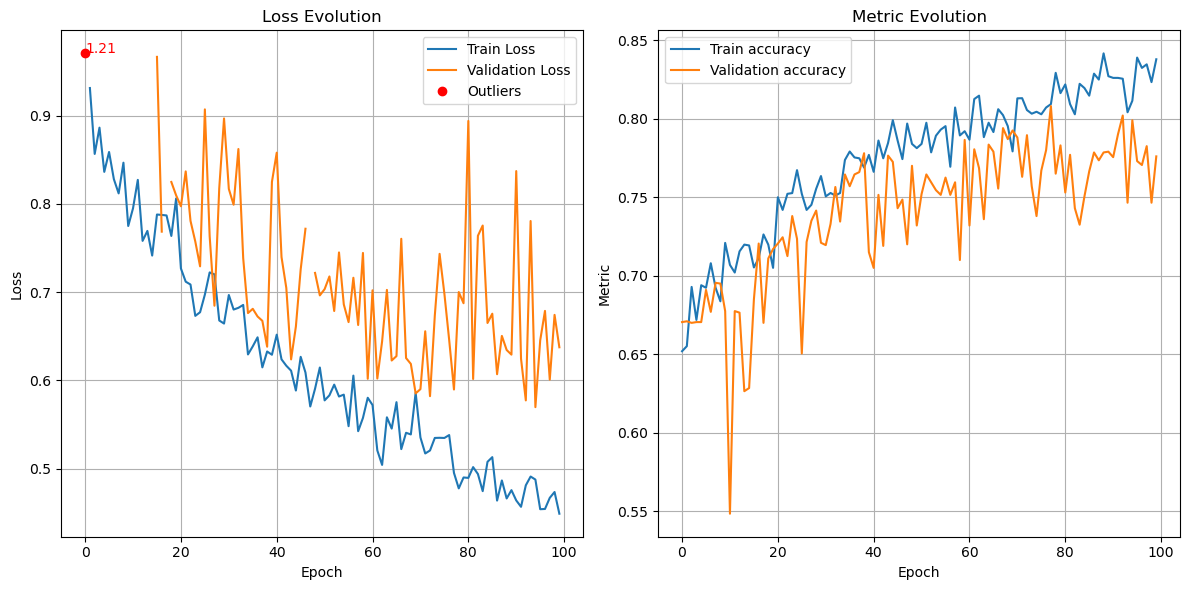

In [7]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes: lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, metrics=METRICS),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)